In [126]:
# Author: Hassan Ali
# Importing libraries 
import numpy as np
import pandas as pd  
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, confusion_matrix 
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, roc_auc_score  

In [158]:
# Loading dataset
sn_df = pd.read_csv('Social_Network_Ads.csv')

In [218]:
# Preprocessing data and converting 'Gender' from catagorical to binary 0s and 1s for Male and Female
sn_df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True) 

In [162]:
# Defining features and target variable
X = sn_df.drop(columns=['Purchased'])  # Define feature variables (all columns except 'Purchased')
y = sn_df['Purchased']

In [206]:
# Splitting dataset 70:30 into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [208]:
# Fitting logistic regression model on training set & printing summary
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)  # Fit a logistic regression model on the training set
print(logmodel.summary()) 

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            4
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                  0.4416
Time:                        09:25:19   Log-Likelihood:                -103.15
converged:                       True   LL-Null:                       -184.72
Covariance Type:            nonrobust   LLR p-value:                 3.101e-34
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -17.9210     39.484     -0.454      0.650     -95.308      59.466
User ID          4.105e-07   2.52e-06      0.163      0.870   -4.52e-06    5.34e-06
Gender              0.3015      

In [210]:
# Prediction and model evaluation
predictions = logmodel.predict(sm.add_constant(X_test))  # Predict probabilities of 'Purchased' on the test set
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions] 

In [212]:
# Calculating & printing model accuracy aswell as confusion matrix
print(accuracy_score(y_test, bin_predictions))  
print(confusion_matrix(y_test, bin_predictions))

0.8916666666666667
[[77  4]
 [ 9 30]]


In [214]:
# ROC Curve and AUC Score for False Positive Rate, True Positive Rate & thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)  
roc_auc = roc_auc_score(y_test, predictions)

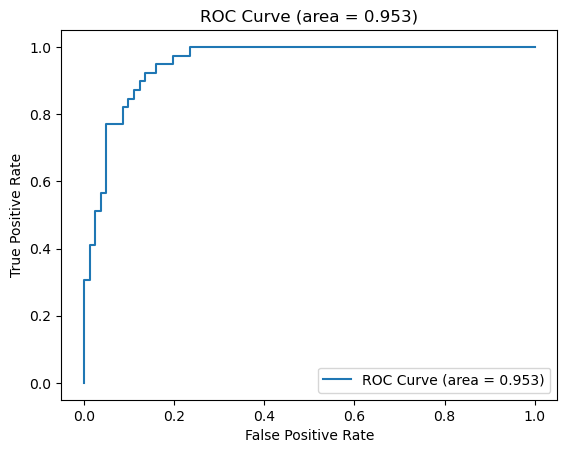

In [216]:
# ROC Curve plot
plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)  
plt.title('ROC Curve (area = %0.3f)' % roc_auc)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.legend(loc="lower right")  
plt.show()  